In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
# import chardet

# with open("/kaggle/input/sms-spam-collection-dataset/spam.csv", "rb") as f:
#     result = chardet.detect(f.read())

# print(result)


In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding= 'Windows-1252')

In [4]:
df.shape

(5572, 5)

In [5]:
  df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [6]:
df = df.rename(columns={'v1' : 'target', 'v2' : 'text'})

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [10]:
df.drop_duplicates(keep='first', inplace=True)

([<matplotlib.patches.Wedge at 0x7fdf0c782510>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

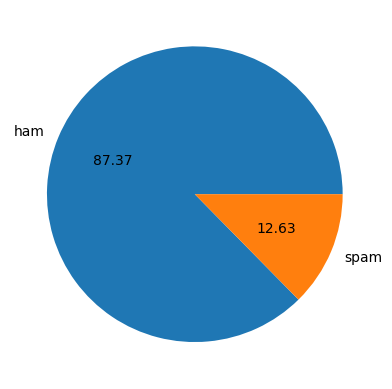

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [12]:
import nltk 

In [13]:
df['num_characters']=df['text'].apply(len)

In [14]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [16]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [17]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [18]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
     y.append(ps.stem(i))
        
    return " ".join(y)

In [19]:
df['transformed'] = df['text'].apply(transform_text)

In [20]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=500, min_font_size = 10, background_color='black')


In [21]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed'].str.cat(sep=" "))

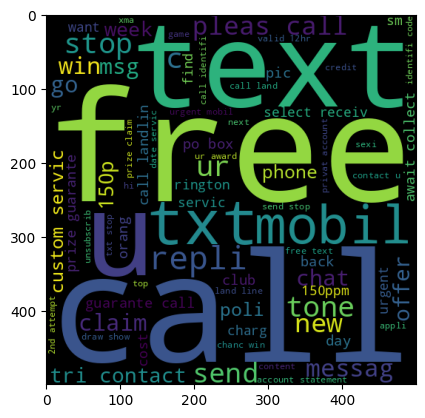

In [22]:
plt.imshow(spam_wc)

In [23]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed'].str.cat(sep=" "))

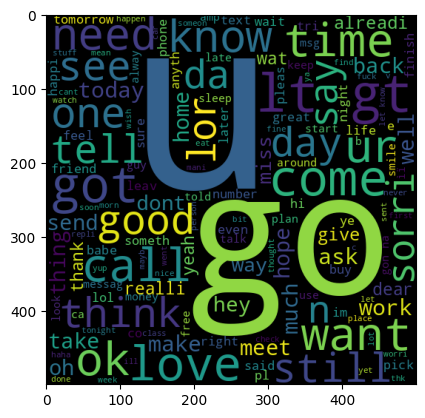

In [24]:
plt.imshow(ham_wc)

In [25]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed
3078,0,*deep sigh* ... I miss you :-( ... I am really...,129,36,3,deep sigh miss realli surpris gone net cafe ye...
4800,0,The guy at the car shop who was flirting with ...,240,53,3,guy car shop flirt got phone number paperwork ...
1446,0,Looks like u wil b getting a headstart im leav...,159,33,1,look like u wil b get headstart im leav bout u...
1888,0,No. On the way home. So if not for the long dr...,85,21,3,way home long dri spell season would
4392,1,RECPT 1/3. You have ordered a Ringtone. Your o...,72,15,3,recpt order rington order process


In [26]:
# We will use naive bayes for this model because for textual data 
# naive bayes is usually used.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [28]:
X = tfidf.fit_transform(df['transformed']).toarray()

In [29]:
X.shape

(5169, 3000)

In [30]:
y = df['target'].values

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [33]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [34]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [35]:
# gnb.fit(X_train, y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test, y_pred1))
# print(confusion_matrix(y_test, y_pred1))
# print(precision_score(y_test, y_pred1))

In [36]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [37]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.svm import SVC

In [38]:
# # Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [39]:
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [40]:
# voting.fit(X_train, y_train)

In [41]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [42]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))